In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
from difflib import SequenceMatcher
from tkinter import simpledialog
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
import tkinter as tk
import numpy as np
import easyocr
import cv2
import os

In [3]:
# Run this code. Importing easyocr won't work if you don't
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [4]:
# You only need to run this once
reader = easyocr.Reader(['ch_tra', 'en'])

In [5]:
input_folder = '../dataset/IDCAR2015_Dataset/test/test_images'
output_folder = 'results'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Code to test model on a single image

In [6]:
img = cv2.imread('../dataset/Custom Dataset/test_image_1.jpg')
result = reader.readtext(img)

In [7]:
# Prepare to store detected texts and confidence scores
detected_texts = []
confidence_scores = []

In [8]:
# Loop through the results and draw bounding boxes
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])  
    bottom_right = tuple([int(val) for val in detection[0][2]])  
    
    # Draw the rectangle (green box)
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
    
    # Extract detected text and confidence score
    detected_text = detection[1]
    confidence = detection[2]
    
    # Store detected text and confidence
    detected_texts.append(detected_text)
    confidence_scores.append(confidence)
    
    # Optionally, display the detected text on the image
    cv2.putText(img, detected_text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [9]:
now = datetime.now()
datetime_str = now.strftime("%Y%m%d_%H%M%S") 

output_path = os.path.join("results", f'result-{datetime_str}.jpg')  # Use a fixed filename or create dynamic filenames
cv2.imwrite(output_path, img)
print("Image saved.")

Image saved.


In [10]:
print("Detected Texts and Confidence Scores:")

for i, (text, score) in enumerate(zip(detected_texts, confidence_scores)):
    print(f"{i + 1}: {text} | Confidence: {score:.2f}")

Detected Texts and Confidence Scores:
1: FINAL SEASON | Confidence: 0.66
2: Aas; | Confidence: 0.10
3: p | Confidence: 0.01
4: Taf | Confidence: 0.01
5: m三 | Confidence: 0.00
6: =881123 | Confidence: 0.00
7: 3051573 | Confidence: 0.01
8: 16516;185118 | Confidence: 0.00


In [ ]:
# Plotting the accuracy based on confidence scores
plt.figure(figsize=(10, 5))
plt.plot(confidence_scores, marker='o', linestyle='-', color='b')
plt.title('Detected Text Confidence Scores')
plt.xlabel('Detection Index')
plt.ylabel('Confidence Score')
plt.ylim(0, 1)  # Confidence scores are between 0 and 1
plt.grid()
plt.xticks(np.arange(len(detected_texts)), [f'Text {i+1}' for i in range(len(detected_texts))], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for the graph
texts = []
confidences = []
total_confidence = 0
num_detections = len(result)

# Gather data
for detection in result:
    detected_box, detected_text, confidence = detection
    total_confidence += confidence
    
    # Store detected text and confidence for the graph
    texts.append(detected_text)
    confidences.append(confidence)
    
    # Print detected text and confidence
    #print(f"Detected Text: {detected_text} | Confidence: {confidence:.2f}")

# Calculate average confidence
average_confidence = total_confidence / num_detections if num_detections > 0 else 0

# Output the average confidence
print(f"Average Confidence: {average_confidence:.2f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(texts, confidences, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Detected Text')
plt.title('Confidence Scores for Detected Text')
plt.xlim(0, 1)  # Confidence is between 0 and 1
plt.tight_layout()

# Code to test model on multiple images

In [1]:
for file_name in os.listdir(input_folder):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        img_path = os.path.join(input_folder, file_name)
        img = cv2.imread(img_path)
        res = reader.readtext(img)

        detected_texts = []
        confidence_scores = []

        # Loop through the results and draw bounding boxes
        for detection in res:
            top_left = tuple([int(val) for val in detection[0][0]])  
            bottom_right = tuple([int(val) for val in detection[0][2]])  
            
            # Draw the rectangle (green box)
            cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
            
            # Extract detected text and confidence score
            detected_text = detection[1]
            confidence = detection[2]
            
            # Store detected text and confidence
            detected_texts.append(detected_text)
            confidence_scores.append(confidence)
            
            # Optionally, display the detected text on the image
            cv2.putText(img, detected_text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Get the current date and time for a unique filename
            now = datetime.now()
            datetime_str = now.strftime("%Y%m%d_%H%M%S")

            # Save the processed image with detected texts in the output folder
            output_path = os.path.join(output_folder, f'result-{datetime_str}_{file_name}')
            cv2.imwrite(output_path, img)
            print(f"Processed and saved: {output_path}")

print("All images processed.")

In [9]:
average_confidence = np.mean(confidence_scores)

print(f"Average Confidence Score: {average_confidence:.2f}")

Average Confidence Score: 0.58


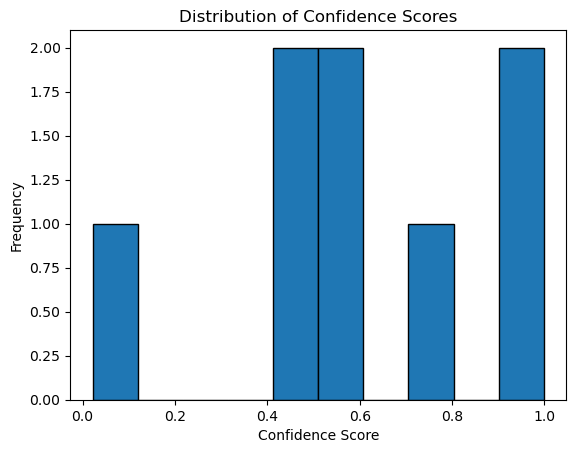

In [10]:
plt.hist(confidence_scores, bins=10, edgecolor='black')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

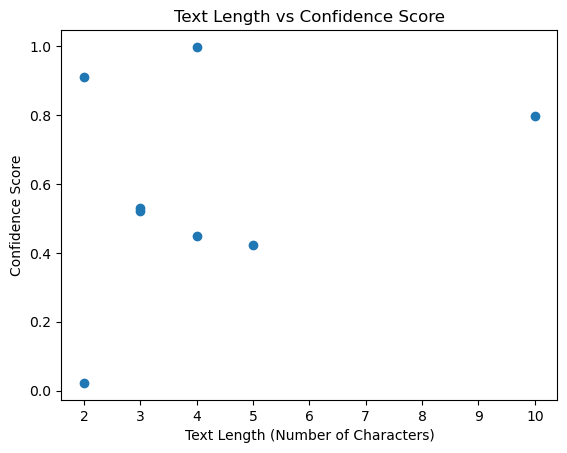

In [11]:
text_lengths = [len(text) for text in detected_texts]

plt.scatter(text_lengths, confidence_scores)
plt.title('Text Length vs Confidence Score')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Confidence Score')
plt.show()